<a href="https://colab.research.google.com/github/uvindu827/heart_disease_predictor/blob/dev/heart_disease_predictor_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [35]:
df = pd.read_excel('/content/drive/MyDrive/HDP_proj/heart_attack_prediction.xlsx')
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [36]:
df_copy = df.copy()

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [38]:
df_copy.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [39]:
cat_cols = df_copy.select_dtypes(include=['object']).columns

for col in cat_cols:
  print(f"{col} : {df_copy[col].nunique()}")
  unique_values = df_copy[col].unique()
  print(unique_values)

gender : 2
['Male' 'Female']
region : 2
['Rural' 'Urban']
income_level : 3
['Middle' 'Low' 'High']
smoking_status : 3
['Never' 'Past' 'Current']
alcohol_consumption : 2
[nan 'Moderate' 'High']
physical_activity : 3
['High' 'Moderate' 'Low']
dietary_habits : 2
['Unhealthy' 'Healthy']
air_pollution_exposure : 3
['Moderate' 'High' 'Low']
stress_level : 3
['Moderate' 'High' 'Low']
EKG_results : 2
['Normal' 'Abnormal']


In [40]:
df_copy.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


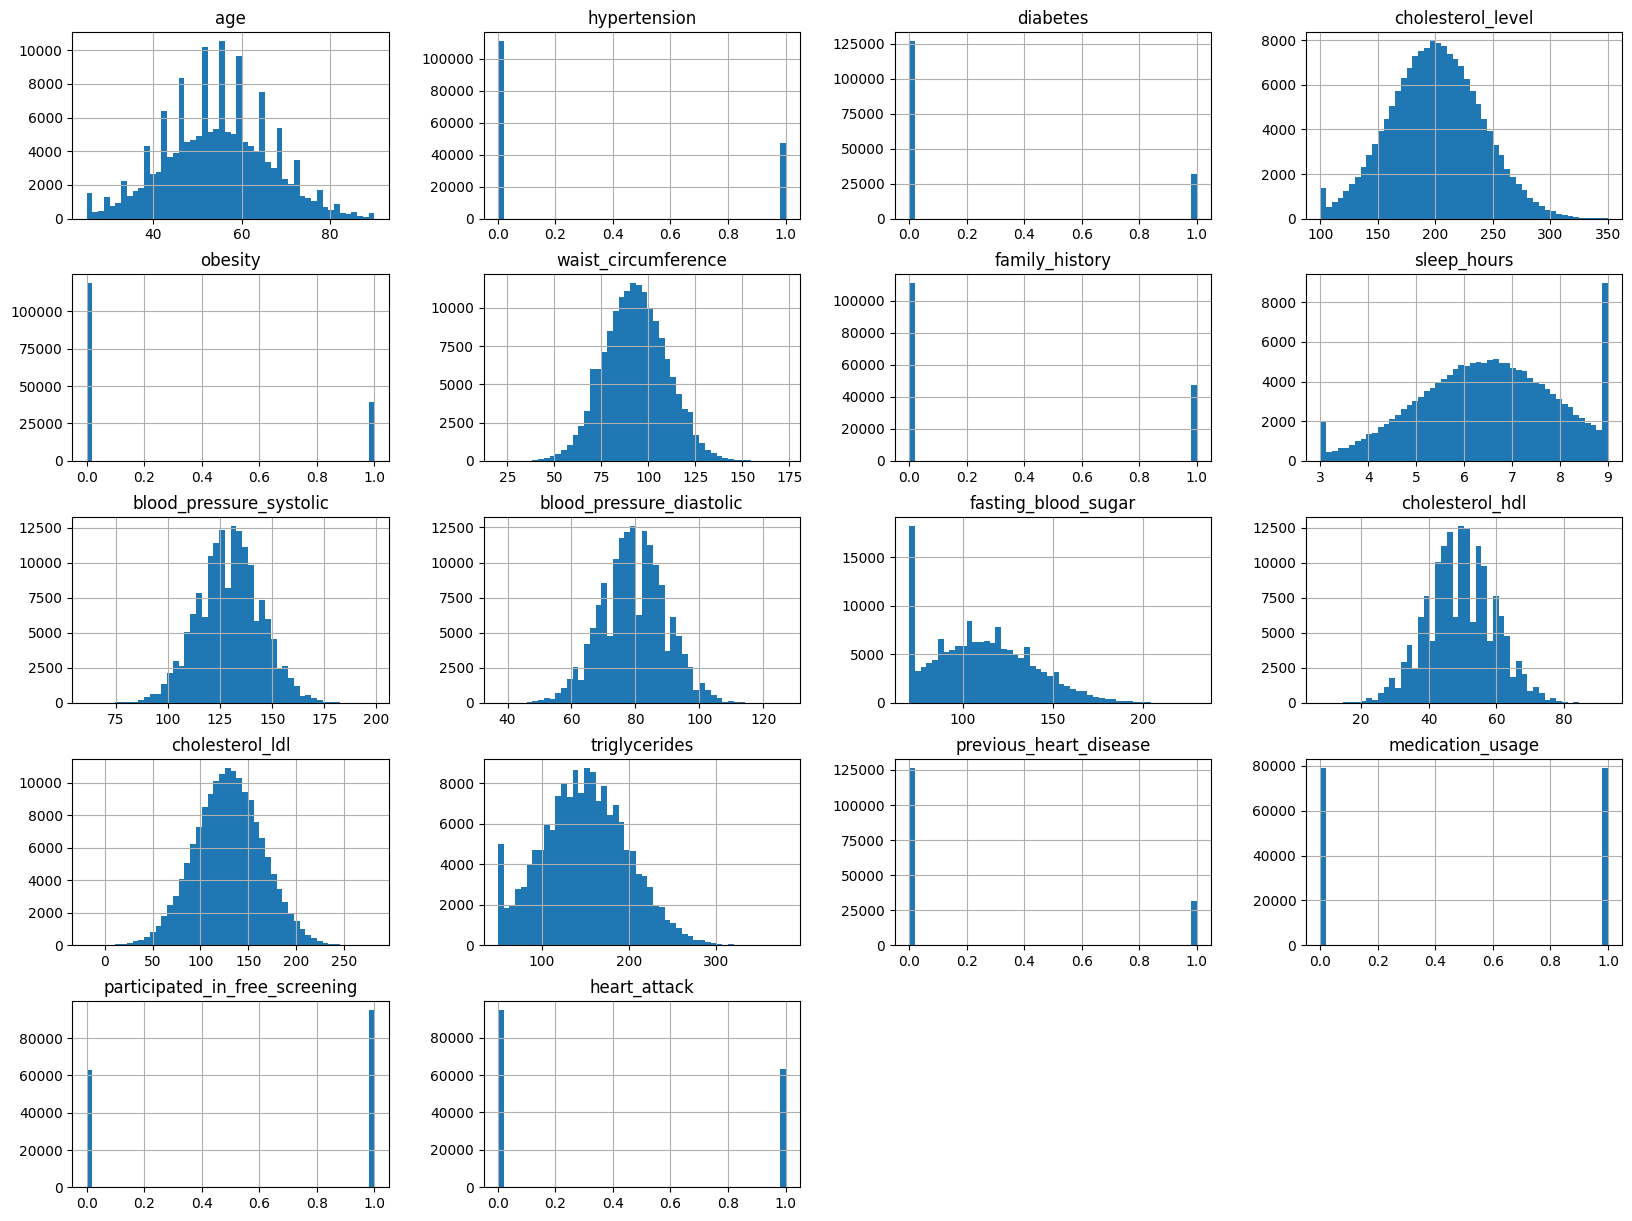

In [41]:
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

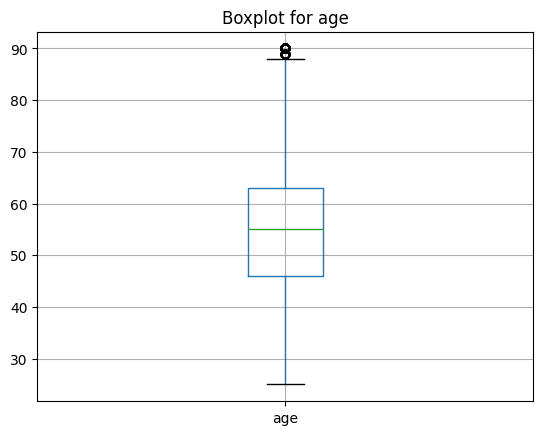

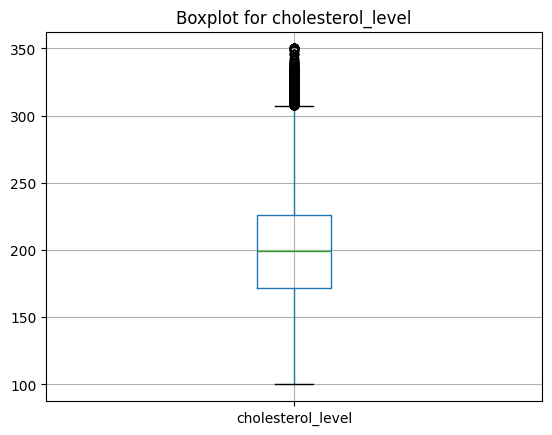

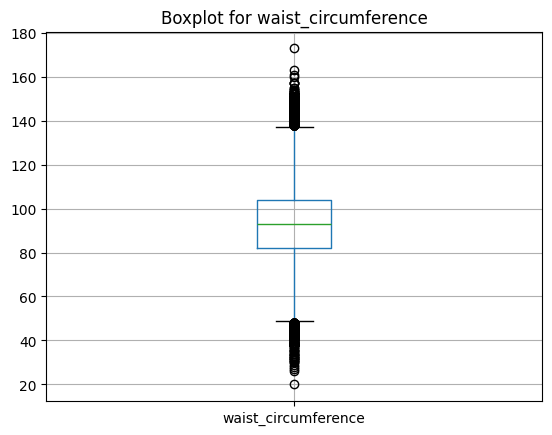

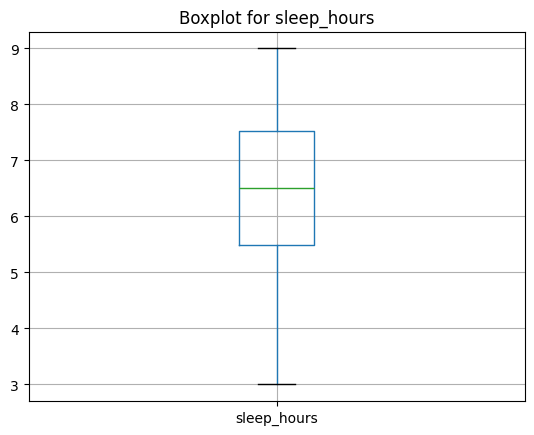

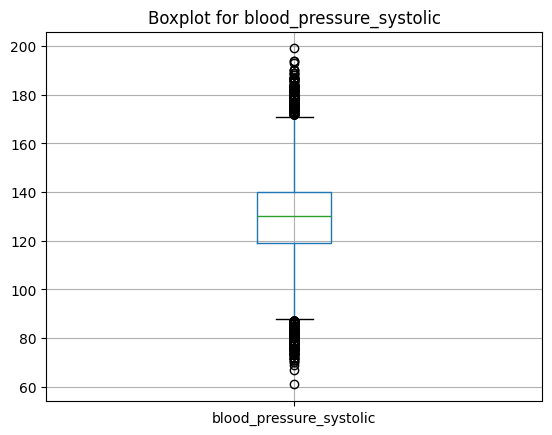

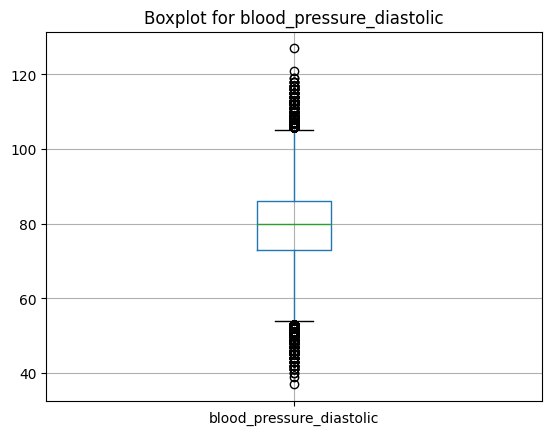

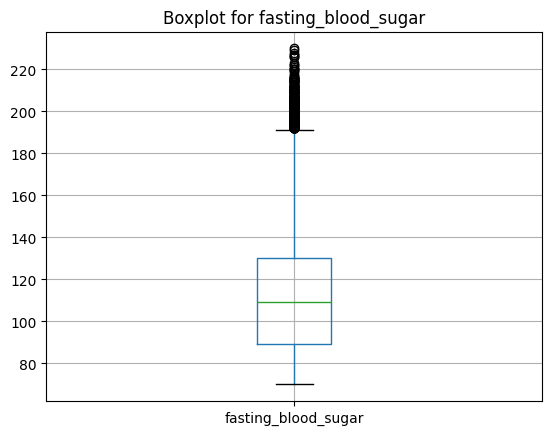

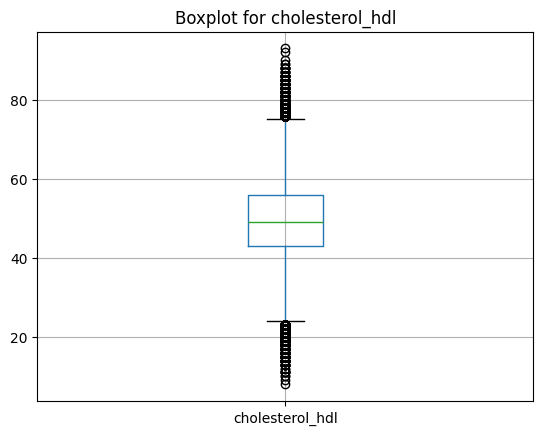

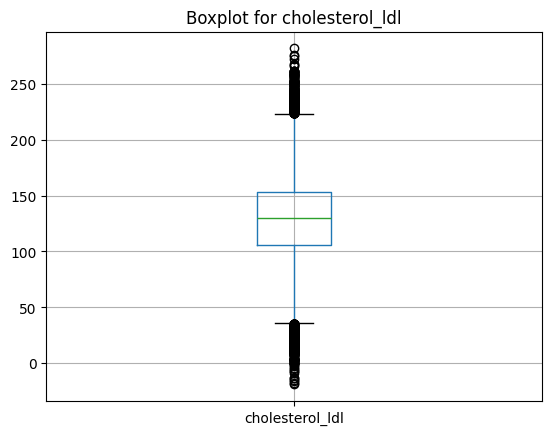

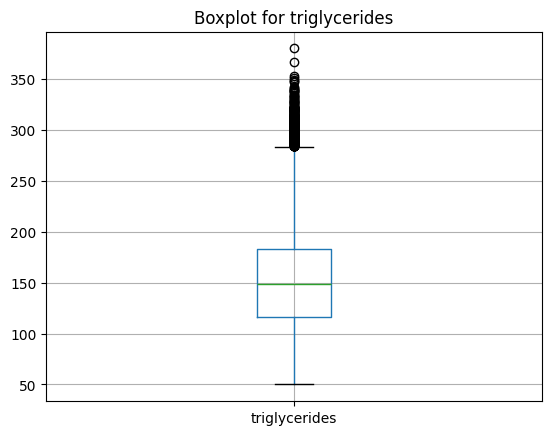

In [42]:
num_cols = df_copy.select_dtypes(include=['number']).columns

num_cols = [
    col for col in num_cols
    if not set(df_copy[col].dropna().unique()).issubset({0,1})
]

for col in num_cols:
  df_copy.boxplot(column=[col])
  plt.title(f'Boxplot for {col}')
  plt.show()

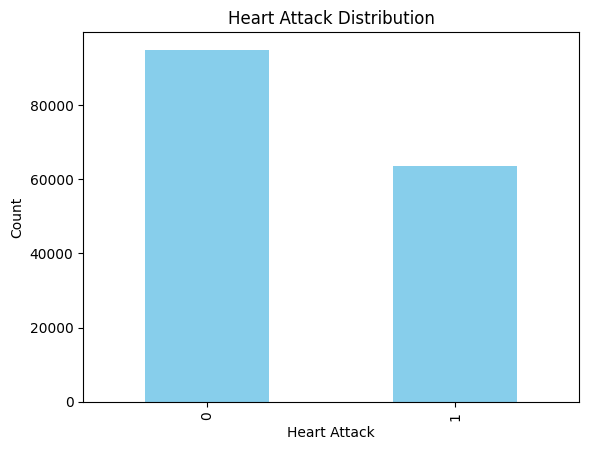

In [43]:
df_copy['heart_attack'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Heart Attack Distribution')
plt.xlabel('Heart Attack')
plt.ylabel('Count')

plt.show()

#Pre processing

In [44]:
target_col = 'heart_attack'

y = df_copy[target_col]

x = df_copy.drop(columns=[target_col])

print(x.shape)
print(y.shape)

num_feat = x.select_dtypes(include=['number']).columns.tolist()
cat_feat = x.select_dtypes(exclude=['number']).columns.tolist()

print(f'Numerica features: {num_feat}')
print(f'Categorica features: {cat_feat}')

(158355, 27)
(158355,)
Numerica features: ['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening']
Categorica features: ['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']


In [45]:
x['alcohol_consumption'] = x['alcohol_consumption'].fillna('Non-drinker')
print(x['alcohol_consumption'].nunique())
print(x['alcohol_consumption'].unique())

3
['Non-drinker' 'Moderate' 'High']


In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

In [48]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_feat),
        ('cat', cat_pipe, cat_feat)
    ]
)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

full_pipeline = imb_pipeline(steps = [
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=1
    ))
])

#Train model

In [50]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'diabetes',
                                                   'cholesterol_level',
                                                   'obesity',
                                                   'waist_circumference',
                                                   'family_history',
                                                   'sleep_hours',
                                                   'blood_pressure_systolic',
                                                   'blood_pressure_diastolic',
                                                   'fasting_blood_suga...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'region',
                                                   'income_level',
                                                   'smoking_status',
                                                   'alcohol_consumption',
                                                   'physical_activity',
                                                   'dietary_habits',
                                                   'air_pollution_exposure',
                                                   'stress_level',
                                                   'EKG_results'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_jobs=1,
                                        random_state=42))])

In [51]:
y_pred = full_pipeline.predict(x_test)

print("Predicted:")
print(y_pred[:10])

print("Actual:")
print(y_test[:10].values)

Predicted:
[1 0 1 1 1 1 0 0 1 1]
Actual:
[1 0 0 0 0 1 0 0 0 0]


In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

target_classes = ['Not at risk', 'At risk']

print(classification_report(y_test, y_pred, target_names=target_classes))

              precision    recall  f1-score   support

 Not at risk       0.77      0.78      0.78     18971
     At risk       0.67      0.66      0.66     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.72      0.72     31671
weighted avg       0.73      0.73      0.73     31671



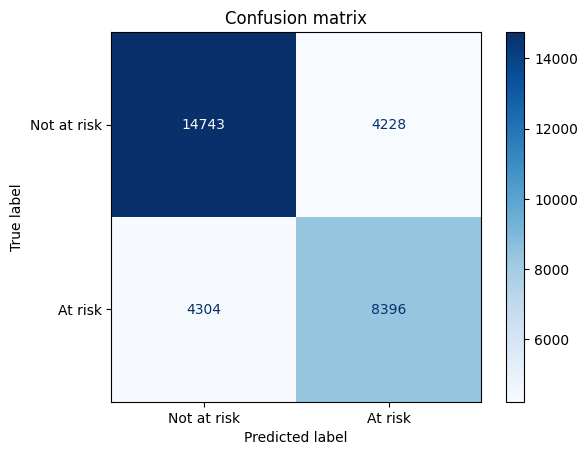

In [53]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_classes)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()

In [54]:
print(cm)

[[14743  4228]
 [ 4304  8396]]
